In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [3]:
Obs = pd.read_csv(r"C:\Users\Nicholas\Downloads\datasets\Biodiversity\observations.csv")
SpecInfo = pd.read_csv(r"C:\Users\Nicholas\Downloads\datasets\Biodiversity\species_info.csv")

print(Obs.head(10))
print(Obs.info())

print(SpecInfo.head(10))
print(SpecInfo.info())

print(Obs.scientific_name.unique())
print(Obs.scientific_name.nunique())
print(Obs.park_name.unique())

print(SpecInfo.category.unique())
print(SpecInfo.scientific_name.nunique())
print(SpecInfo.common_names.nunique())
print(SpecInfo.conservation_status.unique())

                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6           228  
7       

In [4]:
SpecInfo.fillna('No Intervention', inplace = True)
print(SpecInfo.groupby('conservation_status').scientific_name.nunique().reset_index())
#No Intervention filling in for the 5363 NaN values in SpecInfo.conservation_status

ProSpec = SpecInfo.groupby('conservation_status').scientific_name.nunique().reset_index().sort_values(by = 'scientific_name')

  conservation_status  scientific_name
0          Endangered               15
1         In Recovery                4
2     No Intervention             5363
3  Species of Concern              151
4          Threatened               10


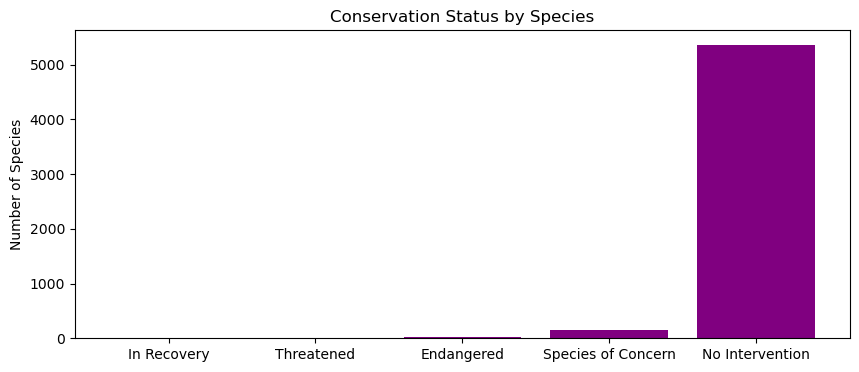

In [5]:
plt.figure(figsize = (10, 4))
ax = plt.subplot()

plt.bar(range(len(ProSpec)), ProSpec.scientific_name, color = "purple")
ax.set_xticks(range(len(ProSpec)))
ax.set_xticklabels(ProSpec.conservation_status)
plt.ylabel("Number of Species")
plt.title("Conservation Status by Species")
plt.show()

In [6]:
SpecInfo['is_protected'] = SpecInfo.conservation_status != 'No Intervention'
print(SpecInfo.head(5))

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole     No Intervention   
1                              American Bison, Bison     No Intervention   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                                      Wapiti Or Elk     No Intervention   

   is_protected  
0         False  
1         False  
2         False  
3         False  
4         False  


In [7]:
CatCount = SpecInfo.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()
CatCount.head(10)

,category,is_protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115
5,Fish,True,11
6,Mammal,False,146
7,Mammal,True,30
8,Nonvascular Plant,False,328
9,Nonvascular Plant,True,5


In [8]:
CatPivot = CatCount.pivot(columns = 'is_protected', index = 'category', values = 'scientific_name').reset_index()
CatPivot.columns = ['category', 'not_protected', 'protected']
CatPivot['percent_protected'] = (CatPivot.protected / (CatPivot.protected + CatPivot.not_protected))
print(CatPivot)

            category  not_protected  protected  percent_protected
0          Amphibian             72          7           0.088608
1               Bird            413         75           0.153689
2               Fish            115         11           0.087302
3             Mammal            146         30           0.170455
4  Nonvascular Plant            328          5           0.015015
5            Reptile             73          5           0.064103
6     Vascular Plant           4216         46           0.010793


In [9]:
#Significance between birds and mammals
Conting = [[30,146],
           [75,413]]
chi2_contingency(Conting)
#p-value of 0.688: Not Significant

#Significance between fish and amphibians
Conting2 = [[7, 72],
            [11, 115]]
chi2_contingency(Conting2)
#p-value of 1: Not Significant

#Significance between reptiles and birds
Conting3 = [[5, 73],
            [75, 413]]
chi2_contingency(Conting3)
#p-value of 0.053: Statistcal Significance

Chi2ContingencyResult(statistic=3.739654778685496, pvalue=0.053135422321542065, dof=1, expected_freq=array([[ 11.02473498,  66.97526502],
       [ 68.97526502, 419.02473498]]))